In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


## Project Planning

### 1) Data Description - players.csv
- 196 observations
- 7 variables
    - experience (character): level of experience of each player
    - subscribe (logical): whether the player is subscribed to a game-related newsletter or not
    - hashedEmail (character): hashed email of each player
    - played_hours (double): hours played by each player in hours
    - name (character): name of each player
    - gender (character): gender of each player
    - Age (double): age of each player
- Issues:
    - not tidy; variable names are not consistent, and variable names are not informative enough
- Average played hours for different experience levels
    - Amateur: 6.02
    - Beginner: 1.25
    - Pro: 2.60
    - Regular: 18.21
    - Veteran: 0.65
- Average played hours: 5.85
- Average age: N/A

In [20]:
players <- read_csv("data/players.csv")
players

players_summary <- players |>
    group_by(experience) |>
    summarize(mean_hours_by_experience = mean(played_hours))
players_summary

players_avg_hour <- players |>
    summarize(mean_hours = mean(played_hours))
players_avg_hour

players_avg_age <- players |>
    summarize(mean_hours = mean(Age))
players_avg_age

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


experience,mean_hours_by_experience
<chr>,<dbl>
Amateur,6.0174603
Beginner,1.2485714
Pro,2.6000000
Regular,18.2083333
Veteran,0.6479167


mean_hours
<dbl>
5.845918


mean_hours
<dbl>
NA


sessions.csv
- 1535 observations
- 5 variables
    - hashedEmail (character): hashed email of each player
    - start_time (character): start time of one session
    - end_time (character): end time of one session
    - original_start_time (double): 
    - original_end_time (double):
- Issues:
    - not tidy; one cell consists of multiple values, and variable names are not informative enough
- Average start time: 1.72e+12
- Average end time: N/A

In [21]:
sessions <- read_csv("data/sessions.csv")
sessions

sessions_avg_start <- sessions |>
    summarize(mean_start = mean(original_start_time))
sessions_avg_start

sessions_avg_end <- sessions |>
    summarize(mean_end = mean(original_end_time))
sessions_avg_end

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


mean_start
<dbl>
1.719201e+12


mean_end
<dbl>
NA


### 2) Questions
Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
- Can "played_hours" and "experience" predict "subscribe" in players.csv?

- "played_hours" and "experience" variables from players.csv will be used to answer the question through the process of knn classification
- Wrangling steps:
    - tidy data by changing the variable names (e.g., subscribe to newsletter_subscription, Age to age)
    - select only the variables of interest ("played_hours", "experience", "subscribe", "age", "gender")
    - filter out NAs

### 3) Exploratory Data Analysis and Visualization

In [34]:
tidy_players <- players |>
    rename(newsletter_subscription = subscribe, experience_level = experience, age = Age) |>
    select(gender, age, played_hours, experience_level, newsletter_subscription) |>
    filter(age != "NA")
tidy_players

gender,age,played_hours,experience_level,newsletter_subscription
<chr>,<dbl>,<dbl>,<chr>,<lgl>
Male,9,30.3,Pro,TRUE
Male,17,3.8,Veteran,TRUE
Male,17,0.0,Veteran,FALSE
⋮,⋮,⋮,⋮,⋮
Male,22,0.3,Veteran,FALSE
Prefer not to say,57,0.0,Amateur,FALSE
Male,17,2.3,Amateur,FALSE


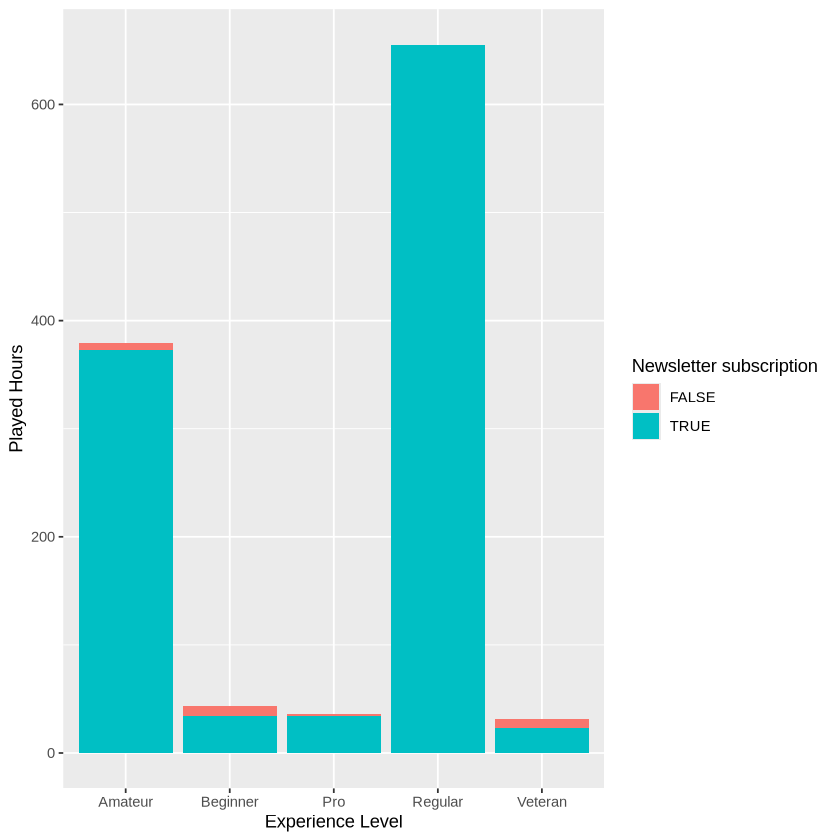

In [40]:
players_graph_1 <- tidy_players |>
    ggplot(aes(x = experience_level, y = played_hours, fill = newsletter_subscription)) +
    geom_bar(stat = "identity") +
    labs (x = "Experience Level", y = "Played Hours", fill = "Newsletter subscription")
players_graph_1

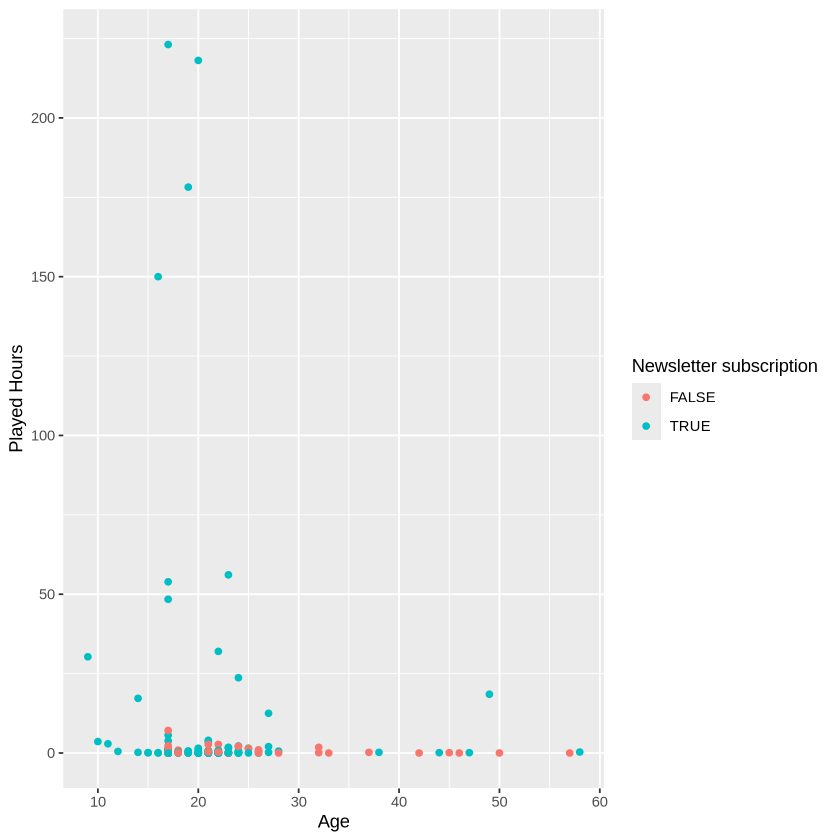

In [41]:
players_graph_2 <- tidy_players |>
    ggplot(aes(x = age, y = played_hours, color = newsletter_subscription)) +
    geom_point() +
    labs (x = "Age", y = "Played Hours", color = "Newsletter subscription")
players_graph_2

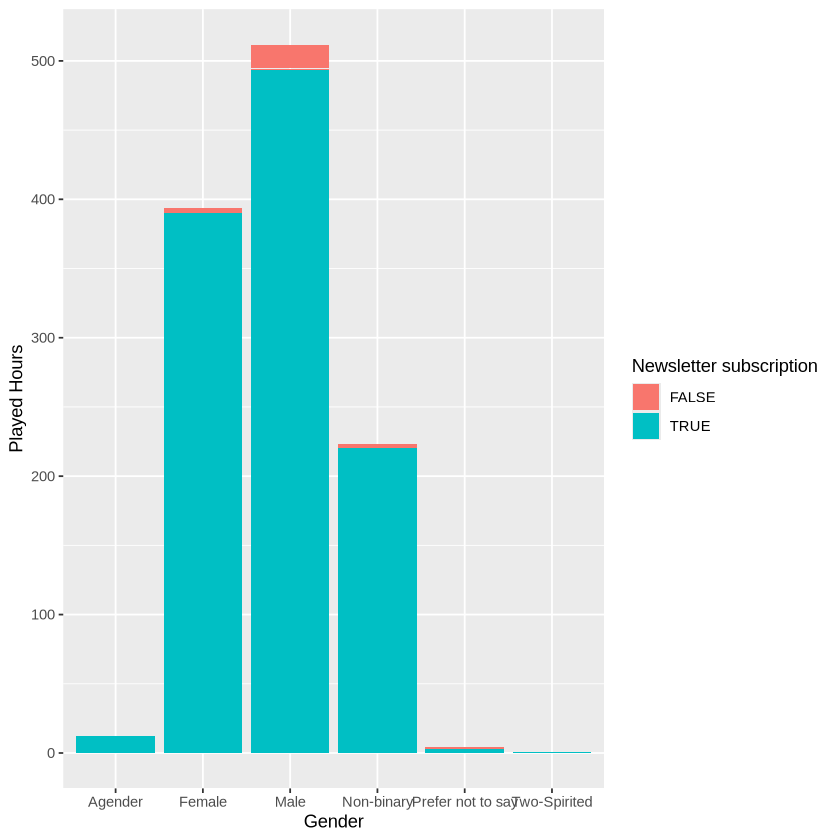

In [43]:
players_graph_3 <- tidy_players |>
    ggplot(aes(x = gender, y = played_hours, fill = newsletter_subscription)) +
    geom_bar(stat = "identity") +
    labs (x = "Gender", y = "Played Hours", fill = "Newsletter subscription")
players_graph_3